<a href="https://colab.research.google.com/github/Poovarasan0368/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


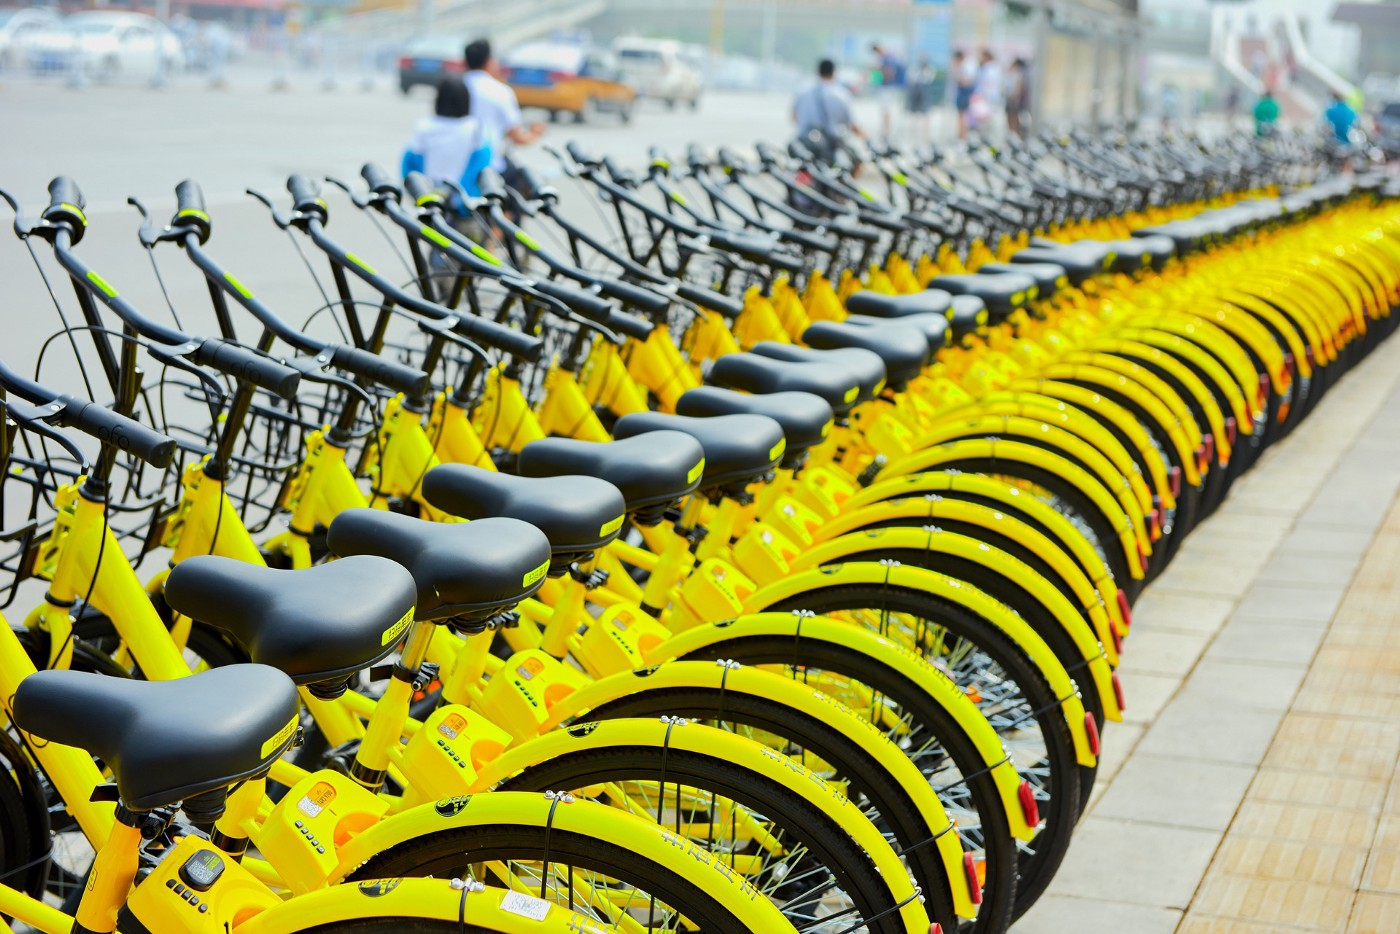

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import libraies and datasets**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from datetime import datetime
import datetime as dt

In [2]:
# mount the google drive 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# reading seol bike data set
Bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bike/SeoulBikeData.csv',encoding ='latin')

# **Explore the datesets**  

In [4]:
# Shape of the Data frame 
Bike_df.shape

(8760, 14)

In [5]:
# head of the data frame
Bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
# Tail of the dataframe 
Bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [7]:
# columns of the  dataframe 
Bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# Discreption of data frame 
Bike_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [9]:
# Information about dataframe 
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# The unique value present in each columns 
Bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#**Data Preprocessing**

In [11]:
# counting the missing values present in each columns

def Null_values():
  Null_values = pd.DataFrame(index= Bike_df.columns)
  Null_values['Non Null counts'] = Bike_df.notnull().sum()
  Null_values['Null counts'] = Bike_df.isnull().sum()
  return Null_values

Null_values()

Non Null counts  Null counts
Date                                  8760            0
Rented Bike Count                     8760            0
Hour                                  8760            0
Temperature(°C)                       8760            0
Humidity(%)                           8760            0
Wind speed (m/s)                      8760            0
Visibility (10m)                      8760            0
Dew point temperature(°C)             8760            0
Solar Radiation (MJ/m2)               8760            0
Rainfall(mm)                          8760            0
Snowfall (cm)                         8760            0
Seasons                               8760            0
Holiday                               8760            0
Functioning Day                       8760            0

In [12]:
# find duplcated values in Data frame 
dup = Bike_df.duplicated().sum()
print("The number of duplicate values in each columns is ",dup)

The number of duplicate values in each columns is  0


In [13]:
# converting the Date column into datetime format
Bike_df['Date'] = Bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
Bike_df['year'] = Bike_df['Date'].dt.year
Bike_df['month'] = Bike_df['Date'].dt.month
Bike_df['day'] = Bike_df['Date'].dt.day_name()

In [14]:
# Create Weekend coulmn to idetify the day is weekend or not
Bike_df['weekday0_weekend1']=Bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

here i created one new column "weekend0_weekday1" this colums usefull for to know weekend can affects the rented bike count or not

In [15]:
Bike_df = Bike_df.drop(columns=['Date','day','year'],axis=1)

for this analysis date, day, year colums are not usefull so i droppped these columns

In [16]:
# Find the weekend and weekdays count 
Bike_df['weekday0_weekend1'].value_counts()

0    6264
1    2496
Name: weekday0_weekend1, dtype: int64

In [17]:
# Changing the some columns into catagory columns

cols=['Hour','month','weekday0_weekend1','Seasons','Holiday','Functioning Day']
for col in cols:
  Bike_df[col] = Bike_df[col].astype('category')

In [18]:
# checking Datatype 
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning Day            8760 non-null   category
 13  month                      8760 n

In [19]:
# Rename the omplex columns name
Bike_df = Bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [20]:
Bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekday0_weekend1  
0  No Holiday             Yes    12                 0  
1  No Holiday             Yes    12                 0  
2  No Holiday             Yes    12                 0  
3  No Holiday             Yes    12                 0  
4  No Holiday             Yes    12                 0

# **Exploratory Data Analysis**



##**Month Analysis**

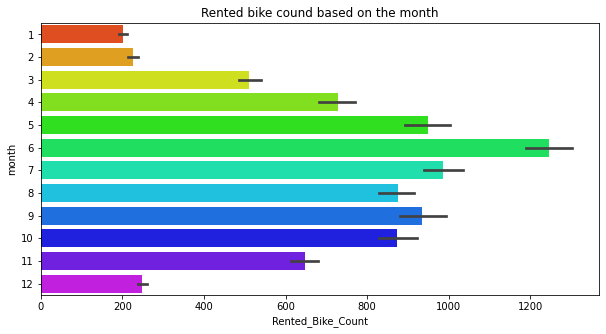

In [21]:
# fnd the Rented bike cound based on the month 

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="gist_rainbow", y='month', x='Rented_Bike_Count')
ax.set(title='Rented bike cound based on the month')
plt.show()

The demand for leased bikes is higher from months 4 to 10 compared to other months, as seen by the above bar plot. These months fall during the summertime.

## **Weekend and Week days analysis**

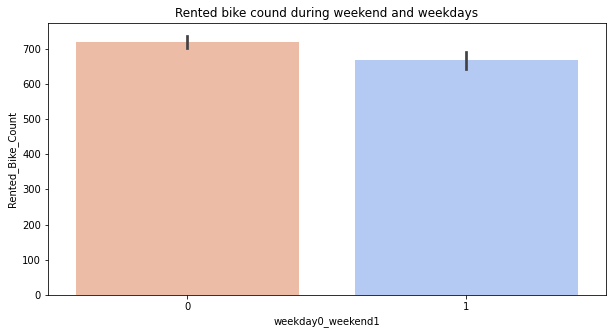

In [22]:
# find the rented bike count durng weekends and weekdays

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="coolwarm_r", x='weekday0_weekend1', y='Rented_Bike_Count')
ax.set(title='Rented bike cound during weekend and weekdays')
plt.show()

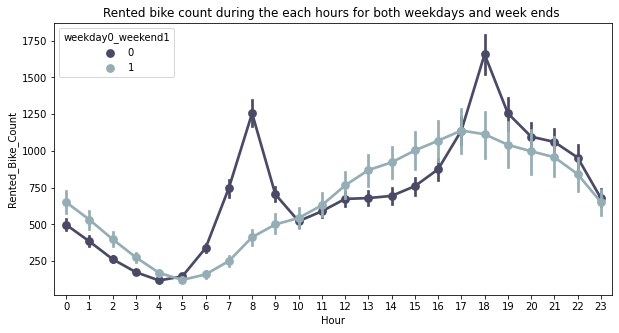

In [23]:
# Deviation of rented bike count according to the hours during both weekdays and week ends 

fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data = Bike_df, palette="bone", hue='weekday0_weekend1', x='Hour' , y='Rented_Bike_Count')
ax.set(title='Rented bike count during the each hours for both weekdays and week ends ')
plt.show()

In the point plot above, the weekdays are depicted as blue and the weekends as sky blue, with the weekdays' rental bike count rising during business hours ( 7 to 9 and 17 to 19 )

## **Hours Analysis**

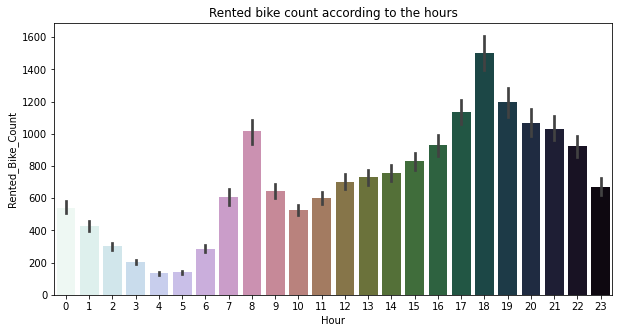

In [24]:
# Rented bike count according to the hours 

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="cubehelix_r", x='Hour', y='Rented_Bike_Count')
ax.set(title='Rented bike count according to the hours')
plt.show()

the above chart show the peak hours of bike renting, morning 7 to 8 and evening 16 to 19 are high peaks hours

## **Functioning Day Analysis**

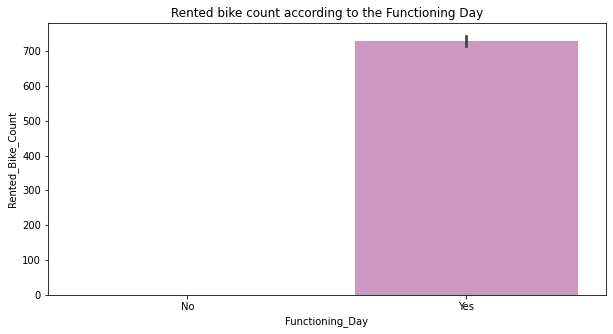

In [25]:
# Rented bike count according to Functioning Day

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="cubehelix", x='Functioning_Day', y='Rented_Bike_Count')
ax.set(title='Rented bike count according to the Functioning Day')
plt.show()

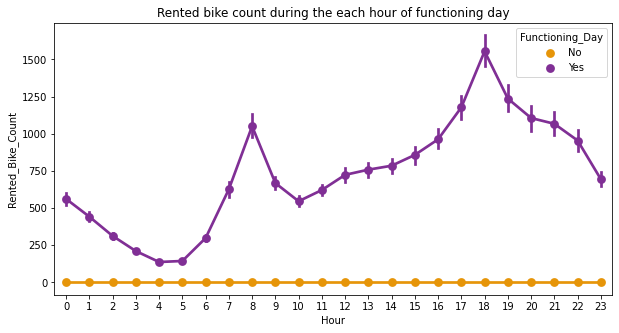

In [26]:
# Rented bike count during the each hour of functioning day

fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data = Bike_df, palette="CMRmap_r", hue='Functioning_Day', x='Hour' , y='Rented_Bike_Count')
ax.set(title='Rented bike count during the each hour of functioning day')
plt.show()

during none functioning day bikes are seems not rented 

## **Seasons Analysis**

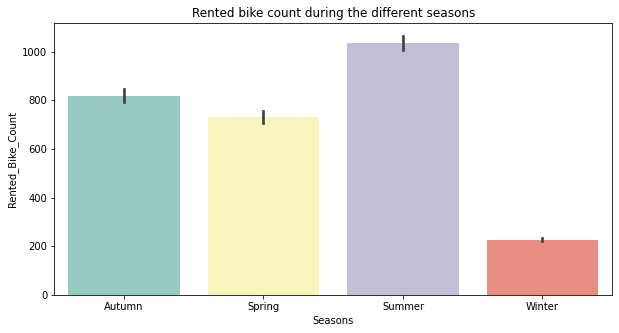

In [27]:
# Rented bike count during the different seasons

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="Set3", x='Seasons' , y='Rented_Bike_Count')
ax.set(title='Rented bike count during the different seasons')
plt.show()

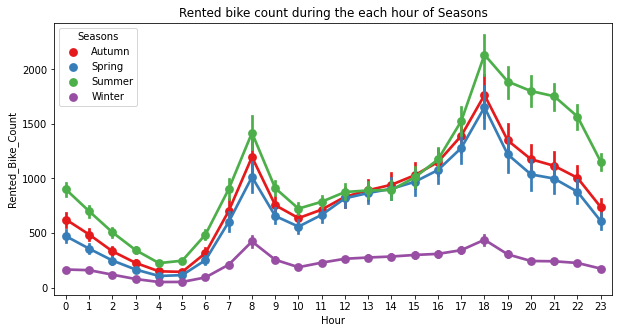

In [28]:
# Rented bike count during the each hour of Seasons

fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data = Bike_df, palette="Set1", hue='Seasons', x='Hour' , y='Rented_Bike_Count')
ax.set(title='Rented bike count during the each hour of Seasons')
plt.show()

In comparison to all other seasons, the performance of the leased bike count during the winter is relatively low, and the bike counts are much raised during the summer.

## **Holiday Analysis**

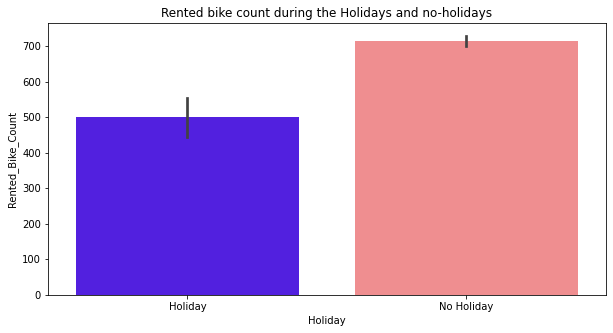

In [29]:
# Rented bike count during the Holidays and no-holidays

fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data = Bike_df, palette="gnuplot2", x='Holiday' , y='Rented_Bike_Count')
ax.set(title='Rented bike count during the Holidays and no-holidays')
plt.show()

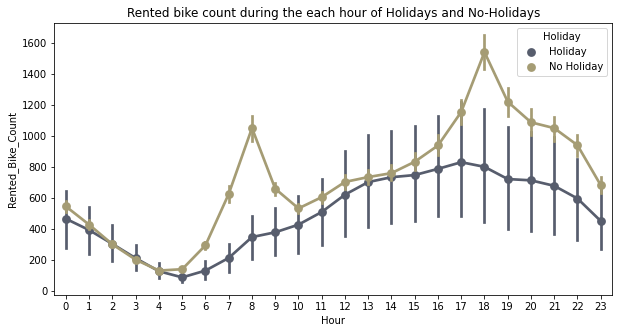

In [30]:
# Rented bike count during the each hour of Holidays and No-Holidays

fig,ax=plt.subplots(figsize=(10,5))
sns.pointplot(data = Bike_df, palette="cividis", hue='Holiday', x='Hour', y='Rented_Bike_Count')
ax.set(title='Rented bike count during the each hour of Holidays and No-Holidays')
plt.show()

When compared to holidays, bike counts are significantly higher on non-holiday days; this may be because of office hours.

In [31]:
# list out the numerical data columns

num_columns = pd.Index(list(Bike_df.select_dtypes(['int64','float64']).columns))
num_columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

### **Displot visulaization**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


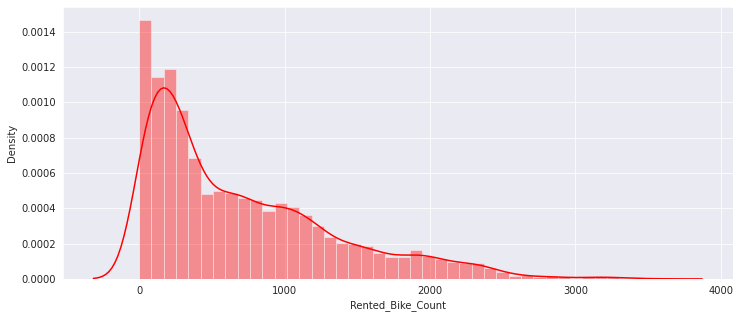

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


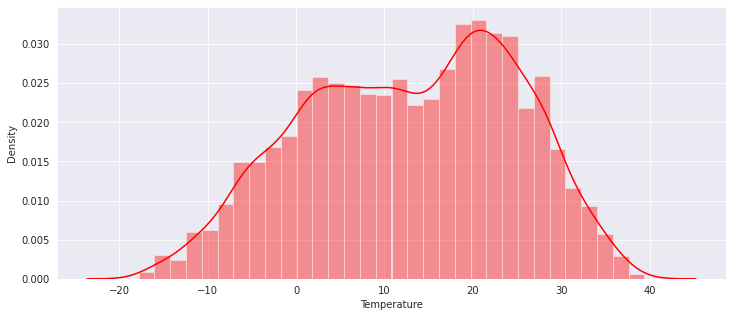

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


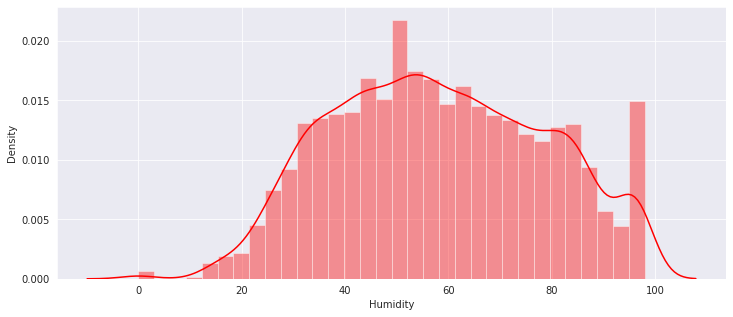

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


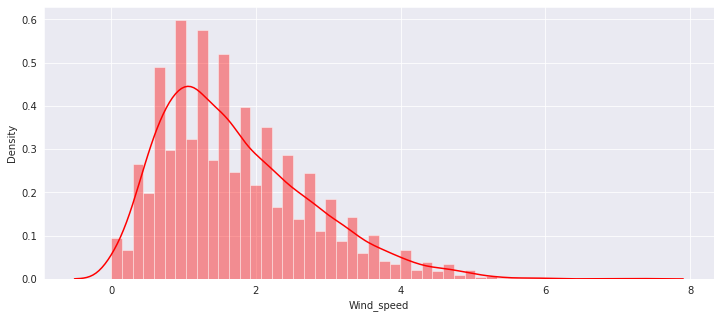

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


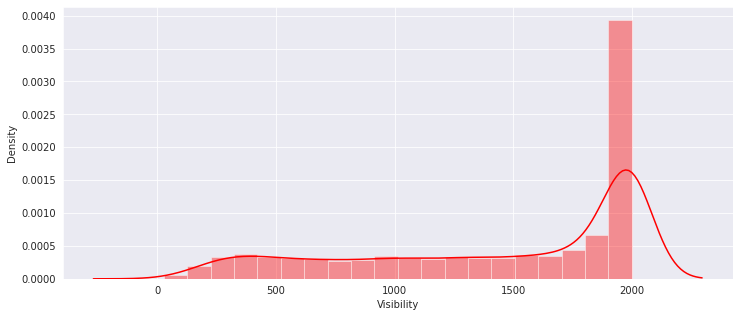

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


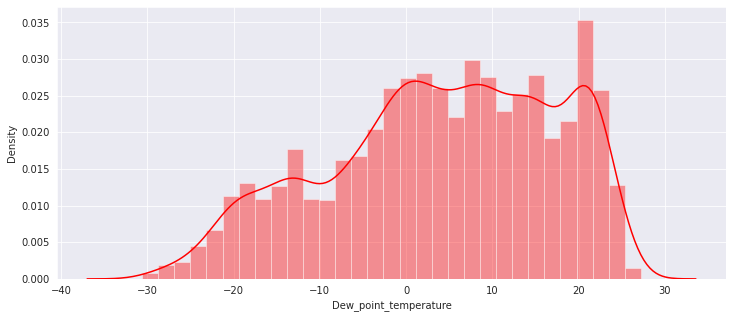

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


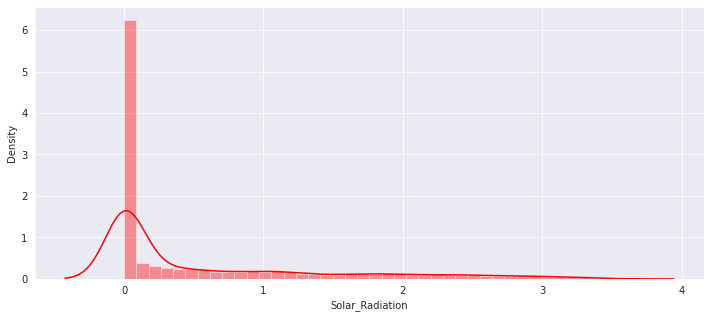

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


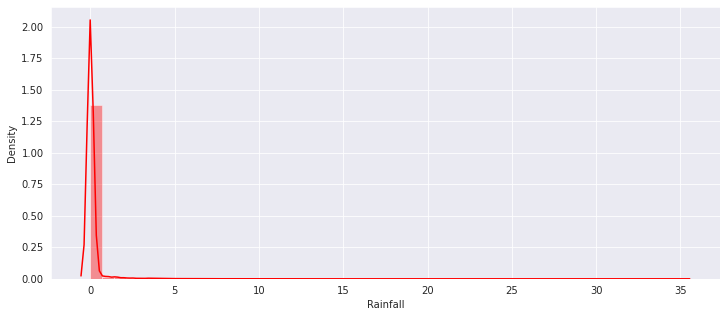

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


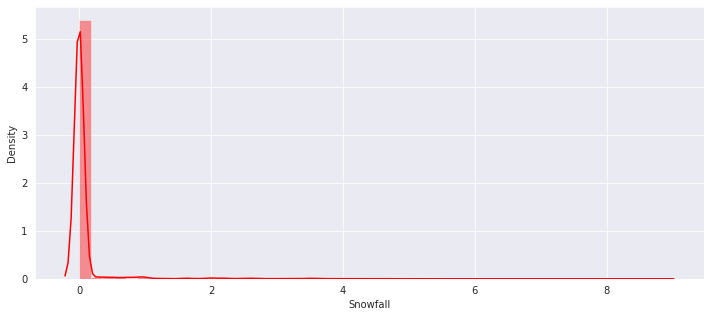

In [32]:
# create distplot for numerical datas present in the data sets 

for i in num_columns:
  sns.set_style("darkgrid")
  plt.rcParams['figure.figsize'] = [12,5];
  sns.distplot(x = Bike_df[i], color="r" )
  plt.xlabel(i)
  plt.show()


### **Line plot Visulaization**

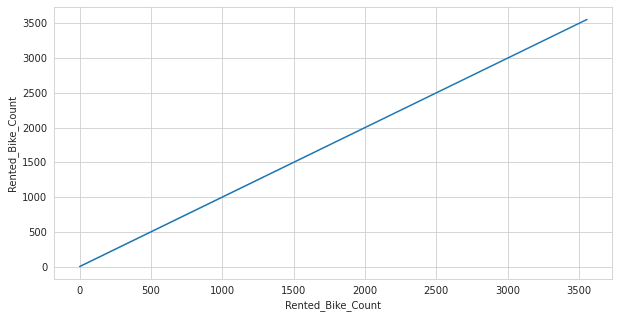

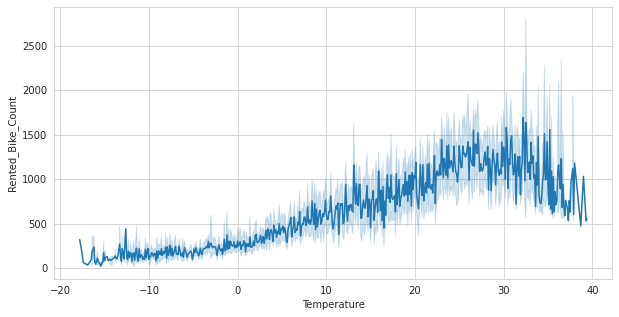

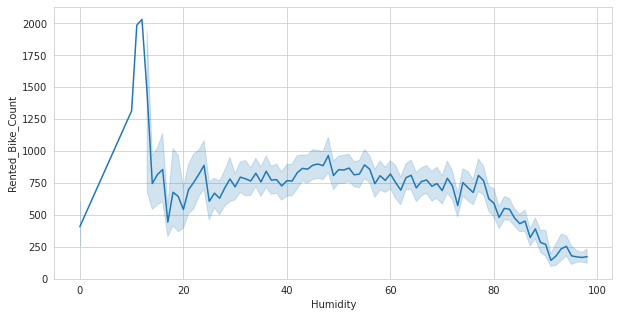

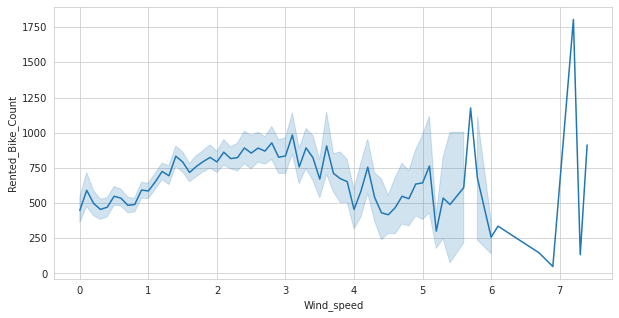

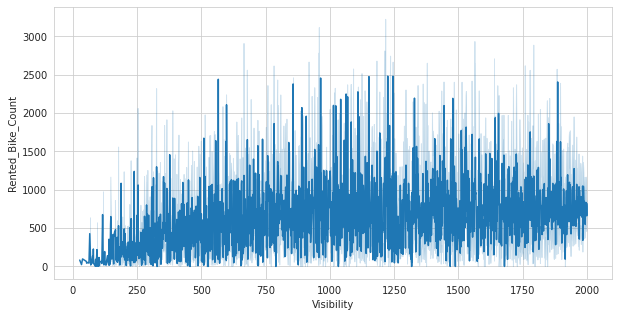

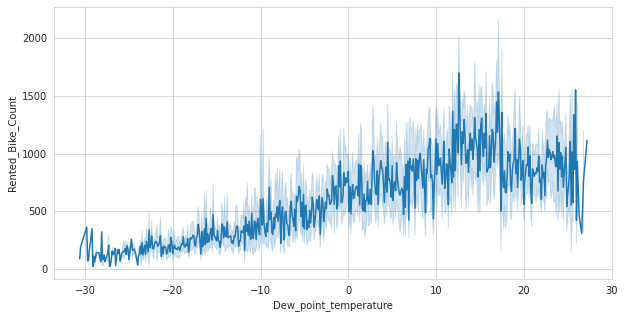

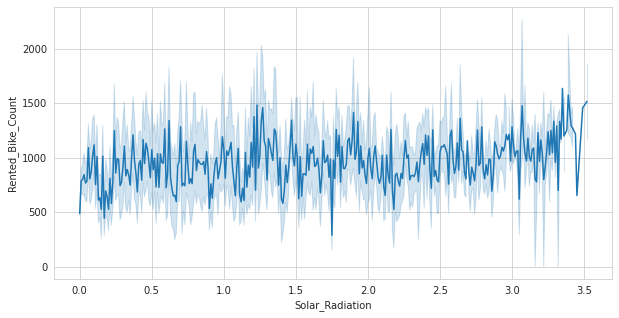

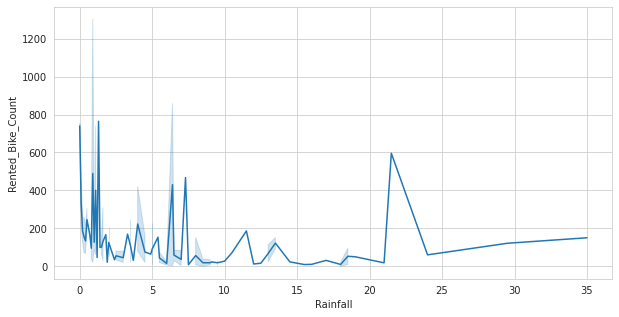

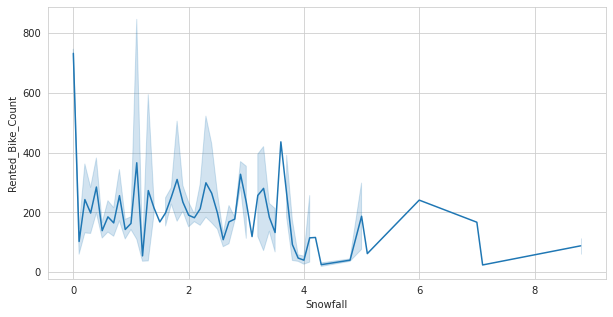

In [33]:

for i in num_columns:
  sns.set_style("whitegrid")
  plt.rcParams['figure.figsize'] = [10,5];
  sns.lineplot(data = Bike_df, palette="g",  x= i , y='Rented_Bike_Count')
  plt.xlabel(i)
  plt.show()

the above line plot show corelation between rented bike and all other columns  

### **Regplot Visulaization**

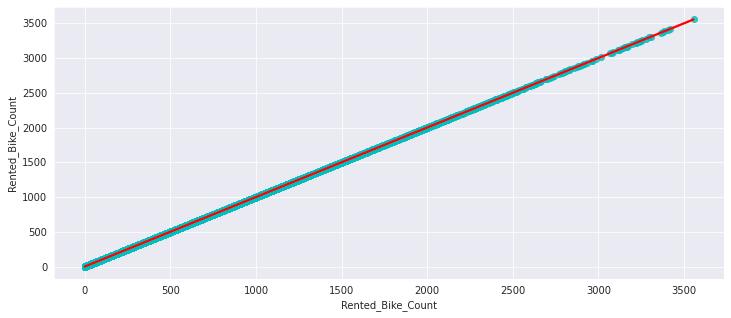

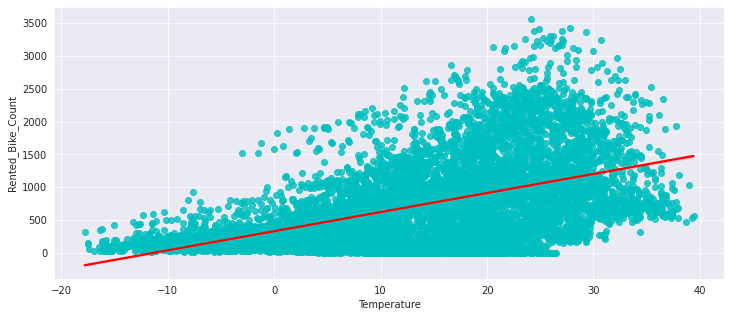

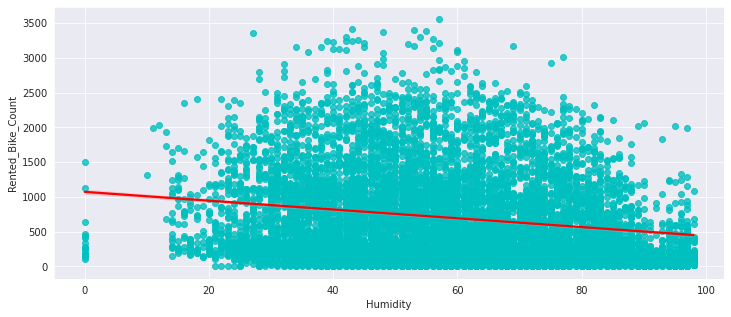

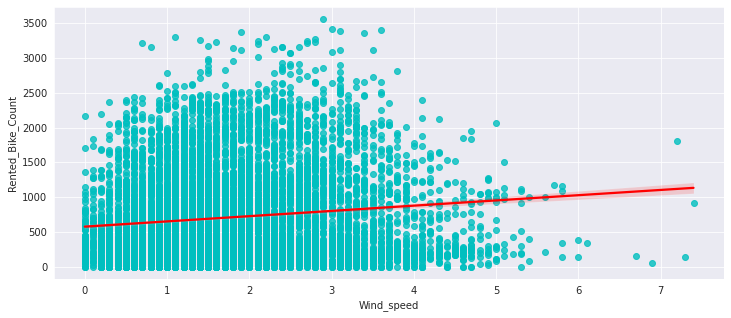

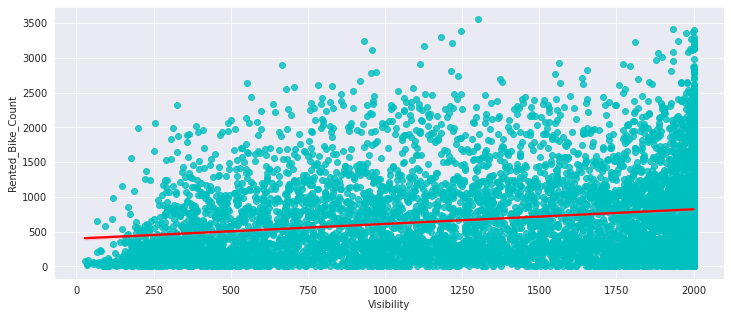

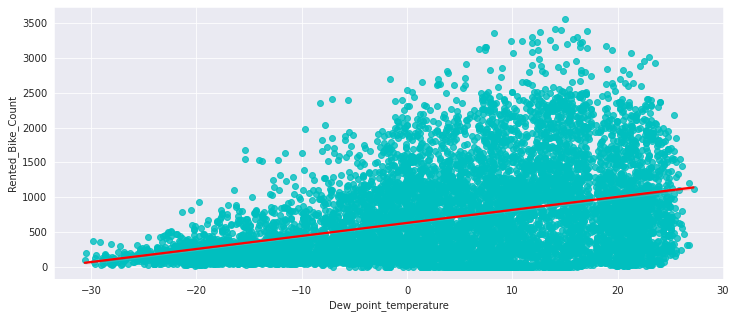

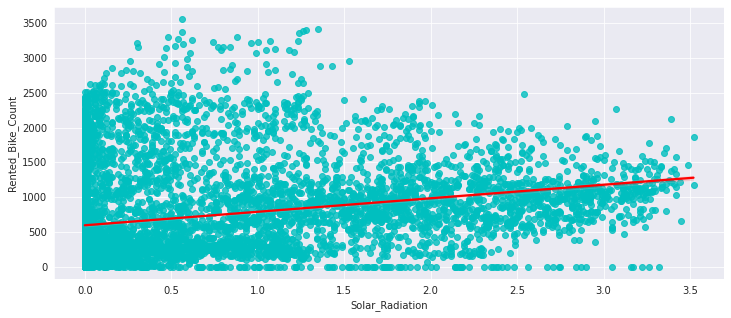

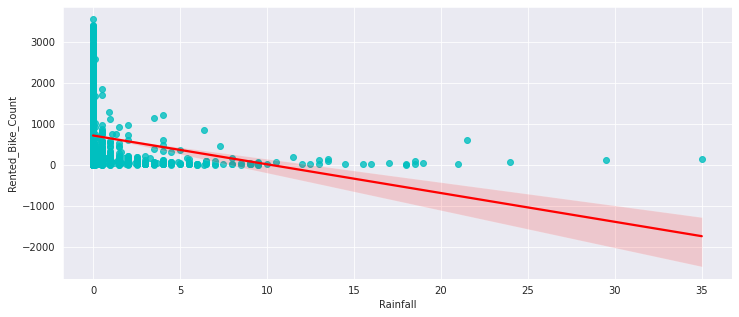

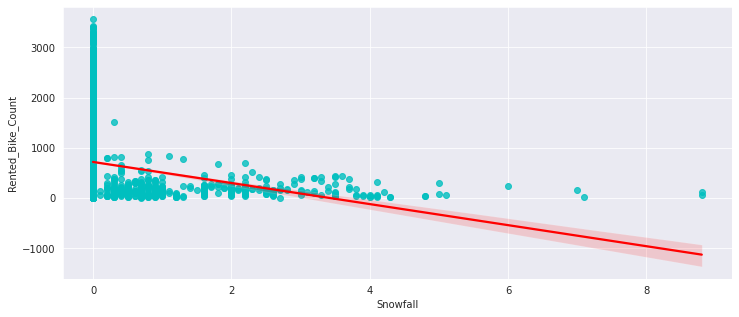

In [34]:
for i in num_columns:
  sns.set_style("darkgrid")
  plt.rcParams['figure.figsize'] = [12,5];
  sns.regplot(x = Bike_df[i], y = Bike_df['Rented_Bike_Count'], scatter_kws={"color": 'c'}, line_kws={"color": "r"})
  plt.xlabel(i)
  plt.show()

the above plot show the spred of datas between rent bike and all the colums

# **Feature Selection**

In [35]:
Bike_df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.121108   
Temperature                     0.538558     1.000000  0.159371   -0.036252   
Humidity                       -0.199780     0.159371  1.000000   -0.336683   
Wind_speed                      0.121108    -0.036252 -0.336683    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.171507   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.176486   
Solar_Radiation                 0.261837     0.353505 -0.461919    0.332274   
Rainfall                       -0.123074     0.050282  0.236397   -0.019674   
Snowfall                       -0.141804    -0.218405  0.108183   -0.003554   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.261837   
Temperature              0.034794               0.912798         0.353505   
Humidity                -0.543090               0.536894        -0.461919   
Wind_speed               0.171507              -0.176486         0.332274   
Visibility               1.000000              -0.176630         0.149738   
Dew_point_temperature   -0.176630               1.000000         0.094381   
Solar_Radiation          0.149738               0.094381         1.000000   
Rainfall                -0.167629               0.125597        -0.074290   
Snowfall                -0.121695              -0.150887        -0.072301   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.123074 -0.141804  
Temperature            0.050282 -0.218405  
Humidity               0.236397  0.108183  
Wind_speed            -0.019674 -0.003554  
Visibility            -0.167629 -0.121695  
Dew_point_temperature  0.125597 -0.150887  
Solar_Radiation       -0.074290 -0.072301  
Rainfall               1.000000  0.008500  
Snowfall               0.008500  1.000000

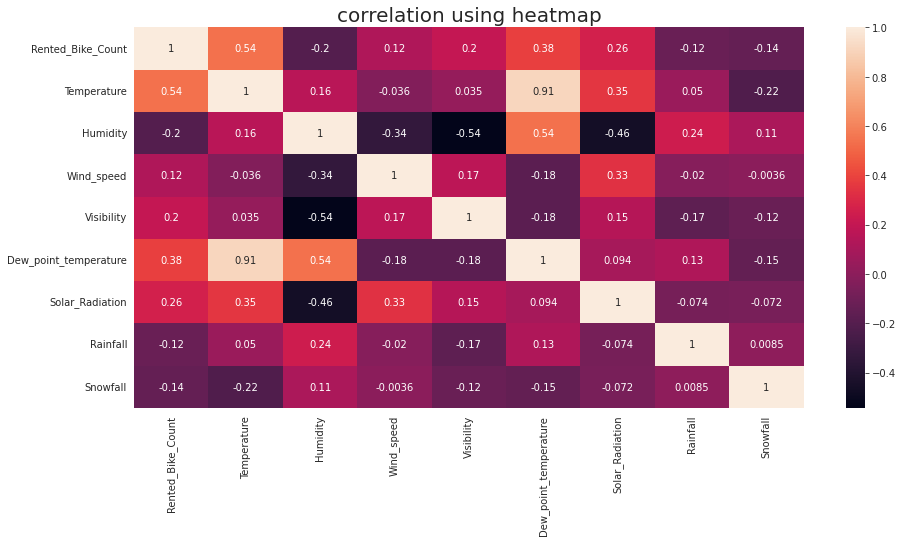

In [36]:
#checking correlation using heatmap

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15,7];
sns.heatmap(Bike_df.corr(),annot=True)
plt.title('correlation using heatmap', fontsize= 20 );
plt.show()


In [37]:
# droping Dew point temperature 

Bike_df = Bike_df.drop(['Dew_point_temperature'],axis=1)

The corelation between tempreture and dew point temperature is 0.91 its very high to avoid error in model i have dropped dew_point_temperature column

# **One hot encoding**

In [71]:
# Create dummy variables 

categorical_features = Bike_df.select_dtypes(include=['category'])

bike = Bike_df
bike = bike.drop(categorical_features, axis=1)
data = pd.get_dummies(categorical_features,drop_first=True)
data = pd.concat([bike, data], axis=1)
data.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   weekday0_weekend1_1  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 48 columns]

to performe the regression model the catagorical variable values are converted in numerical using dummies method 

# **Normalise Rented Bike Count column data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


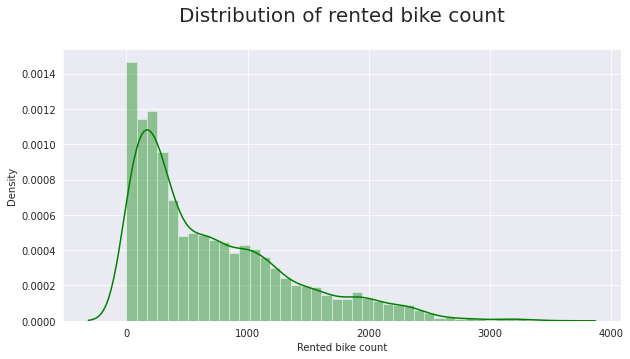

In [72]:
# distrbution of rented bike count

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10,5];
G = sns.distplot(x=Bike_df['Rented_Bike_Count'], color="g");
plt.title('Distribution of rented bike count', fontsize= 20 , y= 1.08);
plt.xlabel('Rented bike count');
plt.show()

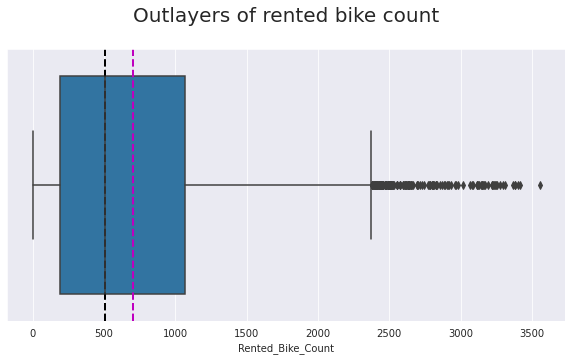

In [73]:
# find outlayetrs in rented bike count columns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10,5];
G = sns.boxplot(x=Bike_df['Rented_Bike_Count']);
G.axvline(Bike_df['Rented_Bike_Count'].mean(), color='m', linestyle='dashed', linewidth=2)
G.axvline(Bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.title('Outlayers of rented bike count', fontsize= 20 , y= 1.08);
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


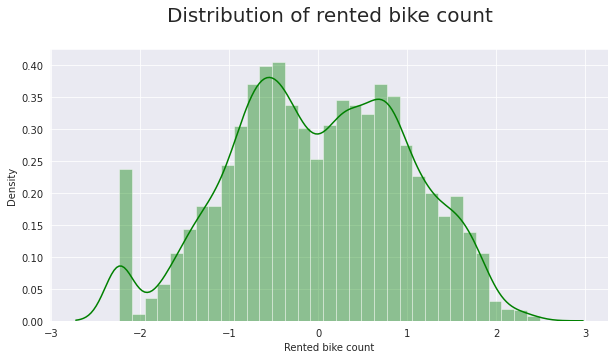

In [74]:
# add squre root to rented bike column to make distrubtion to be normal 

from sklearn.preprocessing import PowerTransformer

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10,5];

pt = PowerTransformer()
normalization = pt.fit_transform(Bike_df[['Rented_Bike_Count']])
G = sns.distplot(normalization, color="g");
plt.title('Distribution of rented bike count', fontsize= 20 , y= 1.08);
plt.xlabel('Rented bike count');
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


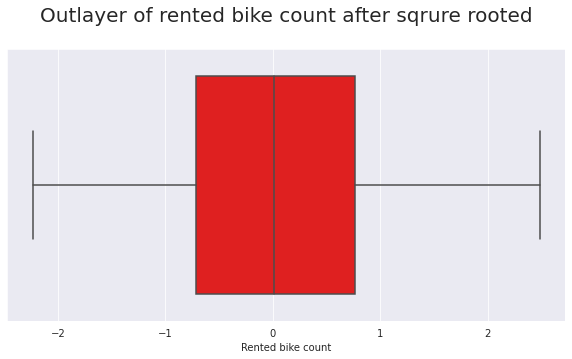

In [75]:
# checking outlayetrs in rented bike count columns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10,5];
G = sns.boxplot(normalization, color="r");
plt.title('Outlayer of rented bike count after sqrure rooted', fontsize= 20 , y= 1.08);
plt.xlabel('Rented bike count');
plt.show()

in ths normaluzation process initialy rented bike count datas slighty right skewed and outlayers are found, for regression model data should be normaly distribution is very required so i converted the rented bike count datas as normal distrubation using power transformer method 

# **Regression models**

## **Creating Train and Test datas for regression**

In [76]:
# Spliting independent(x) and dependent(y) variables 

X = data.drop(columns=['Rented_Bike_Count'], axis=1)
Y = np.sqrt(data['Rented_Bike_Count'])

X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekday0_weekend1_1  
0        0        0         0         0         1                    0  
1        0        0         0         0         1                    0  
2        0        0         0         0         1                    0  
3        0        0         0         0         1                    0  
4        0        0         0         0         1                    0  

[5 rows x 47 columns]

In [77]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [78]:
# create test and train datas

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size=0.20,  random_state=0 )


## **Linear Regression**

In [79]:
# Checking linear regression score and coefficeint

linear = LinearRegression().fit(X_train, Y_train)
print(f'linear score',linear.score(X_train, Y_train),) 
print(f'\n')
print(f'linear coefficeint \n',linear.coef_) 

linear score 0.7745527328667352


linear coefficeint 
 [ 5.13015001e-01 -1.22767835e-01 -4.13109228e-02  1.11126068e-03
  9.16727254e-01 -1.53255669e+00 -8.07225695e-02 -1.94872364e+00
 -4.88230776e+00 -7.21855433e+00 -9.45852159e+00 -9.09121756e+00
 -4.05091676e+00  2.20684979e+00  7.54238202e+00  1.32579600e+00
 -3.16495770e+00 -3.43098887e+00 -2.72035456e+00 -2.91898256e+00
 -2.94598172e+00 -1.84312764e+00  1.20075997e-01  3.83601663e+00
  1.03636669e+01  6.80210980e+00  6.02819334e+00  6.32722762e+00
  5.10059921e+00  1.55360459e+00 -5.40167750e+09 -1.01218304e+10
 -7.41235754e+09  3.46321882e+00  2.83463702e+01 -8.43494814e-01
 -2.01068004e+09 -2.01068004e+09 -2.01068004e+09  2.70947282e+09
  2.70947281e+09  2.70947281e+09 -7.41235754e+09 -7.41235753e+09
 -7.41235753e+09  2.05547188e+00 -1.44324643e+00]


In [80]:
# predicting test and train Values

pred_train = linear.predict(X_train)
pred_test = linear.predict(X_test)

In [81]:
# calculate MSE, RMSE, MAE values for train data

from sklearn.metrics import mean_squared_error

linear_train_MSE = mean_squared_error(Y_train,pred_train)
linear_train_RMSE = np.sqrt(linear_train_MSE)
linear_train_MAE = mean_absolute_error(Y_train,pred_train)
print(f'linear_train_MSE :',linear_train_MSE)
print(f'linear_train_RMSE :',linear_train_RMSE)
print(f'linear_train_MAE :',linear_train_MAE)

# calculate r2 and adjusted r2 value for train data

from sklearn.metrics import r2_score

linear_train_r2 = r2_score(Y_train,pred_train)
linear_train_adjusted_r2 = (1-(1-r2_score(Y_train, pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print(f'linear_train_r2 :',linear_train_r2)
print(f'linear_train_adjusted_r2 :',linear_train_adjusted_r2)

linear_train_MSE : 34.79398073042247
linear_train_RMSE : 5.89864227856059
linear_train_MAE : 4.459079570875118
linear_train_r2 : 0.7745527328667352
linear_train_adjusted_r2 : 0.7683344103577778


In [82]:
# calculate MSE, RMSE, MAE values for test data

from sklearn.metrics import mean_squared_error

linear_test_MSE = mean_squared_error(Y_test, pred_test)
linear_test_RMSE = np.sqrt(linear_test_MSE)
linear_test_MAE = mean_absolute_error(Y_test, pred_test)
print(f'linear_test_MSE :',linear_test_MSE)
print(f'linear_test_RMSE :',linear_test_RMSE)
print(f'linear_test_MAE :',linear_test_MAE)

# calculate r2 and adjusted r2 value for test data

from sklearn.metrics import r2_score

linear_test_r2 = r2_score(Y_test,pred_test)
linear_test_adjusted_r2 = (1-(1-r2_score((Y_test), (pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f'linear_test_r2 :',linear_test_r2)
print(f'linear_test_adjusted_r2 :',linear_test_adjusted_r2)

linear_test_MSE : 33.894123347487565
linear_test_RMSE : 5.821865967839483
linear_test_MAE : 4.442356971270003
linear_test_r2 : 0.7847804376397125
linear_test_adjusted_r2 : 0.7788442173163947


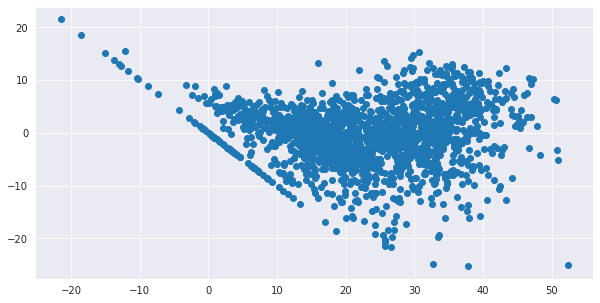

In [83]:
# hetroscattersity plot

plt.scatter(pred_test,(Y_test)-(pred_test))

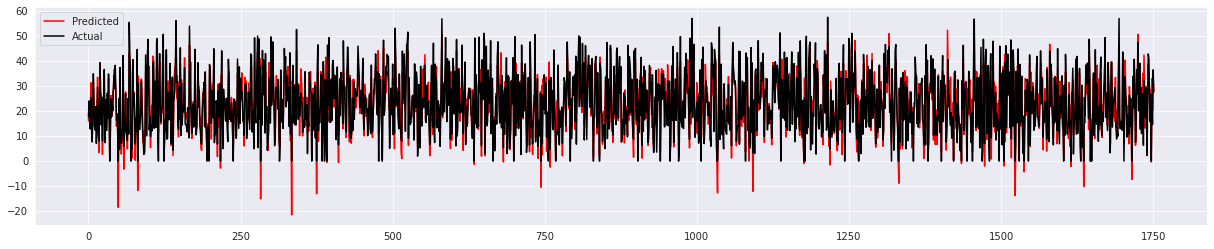

In [84]:
plt.figure(figsize=(21,4))
plt.plot((np.array(pred_test)), c= 'r' )
plt.plot(np.array(Y_test), c = 'black')
plt.legend(["Predicted","Actual"])
plt.show()

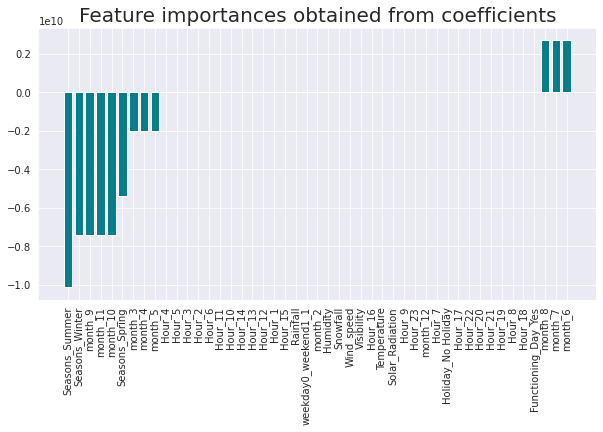

In [85]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': linear.coef_
})
importances = importances.sort_values(by='Importance', ascending=True)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

As per linear regression model the importance features are got as Summer, winter, spring seasons and 6 to 9 months, these  are very important for bike rent.

## **Random forest**

In [86]:
# Checking Random forest regression score 

from sklearn.ensemble import RandomForestRegressor

Random_forest = RandomForestRegressor()
Random_forest.fit(X_train, Y_train)
print(f'Random_forest score',Random_forest.score(X_train, Y_train),) 

Random_forest score 0.9902019351129573


In [87]:
# predicting test and train Values

pred_train = Random_forest.predict(X_train)
pred_test = Random_forest.predict(X_test)

In [88]:
# calculate MSE, RMSE, MAE values for train data

from sklearn.metrics import mean_squared_error

Random_forest_train_MSE = mean_squared_error(Y_train,pred_train)
Random_forest_train_RMSE = np.sqrt(Random_forest_train_MSE)
Random_forest_train_MAE = mean_absolute_error(Y_train,pred_train)
print(f'Random_forest_train_MSE :',Random_forest_train_MSE)
print(f'Random_forest_train_RMSE :',Random_forest_train_RMSE)
print(f'Random_forest_train_MAE :',Random_forest_train_MAE)

# calculate r2 and adjusted r2 value for train data

from sklearn.metrics import r2_score

Random_forest_train_r2 = r2_score(Y_train,pred_train)
Random_forest_train_adjusted_r2 = (1-(1-r2_score(Y_train, pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print(f'Random_forest_train_r2 :',Random_forest_train_r2)
print(f'Random_forest_train_adjusted_r2 :',Random_forest_train_adjusted_r2)

Random_forest_train_MSE : 1.5121659499809936
Random_forest_train_RMSE : 1.2297015694797635
Random_forest_train_MAE : 0.7893209348078016
Random_forest_train_r2 : 0.9902019351129573
Random_forest_train_adjusted_r2 : 0.9899316833232326


In [89]:
# calculate MSE, RMSE, MAE values for test data

from sklearn.metrics import mean_squared_error

Random_forest_test_MSE = mean_squared_error(Y_test, pred_test)
Random_forest_test_RMSE = np.sqrt(Random_forest_test_MSE)
Random_forest_test_MAE = mean_absolute_error(Y_test, pred_test)
print(f'Random_forest_test_MSE :',Random_forest_test_MSE)
print(f'Random_forest_test_RMSE :',Random_forest_test_RMSE)
print(f'Random_forest_test_MAE :',Random_forest_test_MAE)

# calculate r2 and adjusted r2 value for test data

from sklearn.metrics import r2_score

Random_forest_test_r2 = r2_score(Y_test,pred_test)
Random_forest_test_adjusted_r2 = (1-(1-r2_score((Y_test), (pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f'Random_forest_test_r2 :',Random_forest_test_r2)
print(f'Random_forest_test_adjusted_r2 :',Random_forest_test_adjusted_r2)

Random_forest_test_MSE : 12.866714420118715
Random_forest_test_RMSE : 3.587020270380238
Random_forest_test_MAE : 2.1975917382951526
Random_forest_test_r2 : 0.9182994462455092
Random_forest_test_adjusted_r2 : 0.9160459685304498


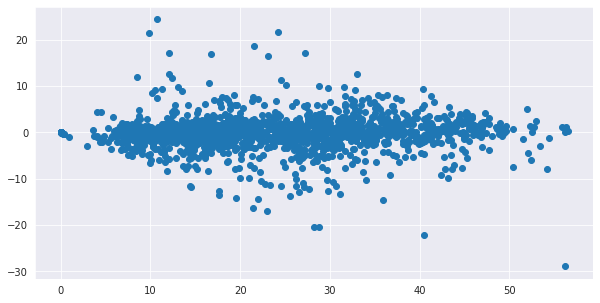

In [90]:
# Heteroscadacity plot
plt.scatter(pred_test,(Y_test)-(pred_test))

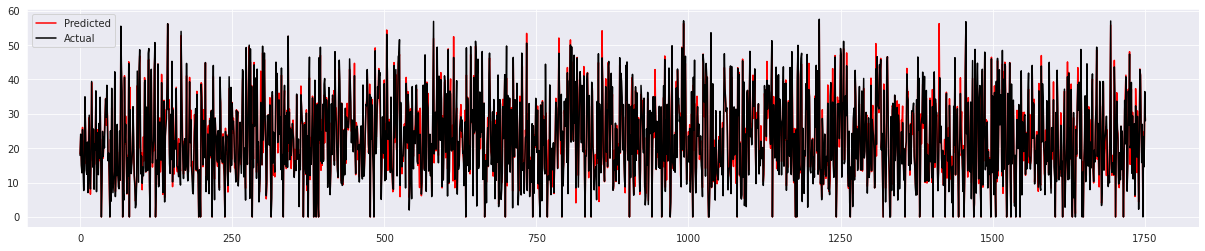

In [91]:
plt.figure(figsize=(21,4))
plt.plot((np.array(pred_test)), c= 'r' )
plt.plot(np.array(Y_test), c = 'black')
plt.legend(["Predicted","Actual"])
plt.show()

In [92]:
important_feature = pd.DataFrame({'Feature' : list(X_train.columns),'Feature Importance' : Random_forest.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

Feature  Feature Importance
0           Temperature            0.318091
1              Humidity            0.157188
34  Functioning_Day_Yes            0.152512
24              Hour_18            0.032477
10               Hour_4            0.030831
5              Rainfall            0.030183
4       Solar_Radiation            0.028905
11               Hour_5            0.027334
9                Hour_3            0.020636
46  weekday0_weekend1_1            0.019741
25              Hour_19            0.015737
8                Hour_2            0.014484
14               Hour_8            0.013926
2            Wind_speed            0.011949
3            Visibility            0.011728
27              Hour_21            0.011591
26              Hour_20            0.010983
23              Hour_17            0.010079
12               Hour_6            0.009638
32       Seasons_Winter            0.008950
28              Hour_22            0.008543
44             month_11            0.005107
7                Hour_1            0.005089
13               Hour_7            0.004393
33   Holiday_No Holiday            0.004386
30       Seasons_Spring            0.003994
36              month_3            0.003924
22              Hour_16            0.003458
29              Hour_23            0.003002
43             month_10            0.002873
39              month_6            0.002239
41              month_8            0.002180
16              Hour_10            0.002013
6              Snowfall            0.001476
21              Hour_15            0.001427
38              month_5            0.001373
37              month_4            0.001104
17              Hour_11            0.001056
15               Hour_9            0.000930
42              month_9            0.000915
31       Seasons_Summer            0.000862
45             month_12            0.000766
40              month_7            0.000680
20              Hour_14            0.000400
35              month_2            0.000314
18              Hour_12            0.000274
19              Hour_13            0.000260

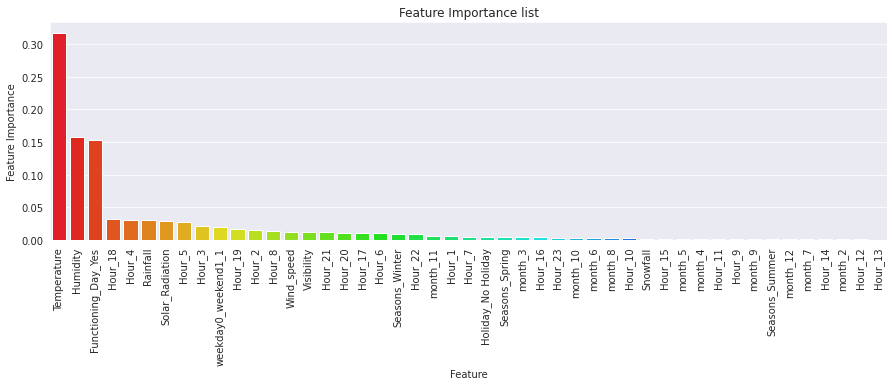

In [93]:

fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

The above Chart shows, Random Forest regression model results as, highly importance features are Temperature, Humidity, Functioning day.

## **Gradient_Boosting**

In [94]:
# Checking Gradient Boosting regression score 

from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boosting = GradientBoostingRegressor()
Gradient_Boosting.fit(X_train, Y_train)
print(f'Gradient_Boosting score',Gradient_Boosting.score(X_train, Y_train),) 

Gradient_Boosting score 0.8786338685747016


In [95]:
# predicting test and train Values

pred_train = Gradient_Boosting.predict(X_train)
pred_test = Gradient_Boosting.predict(X_test)

In [96]:
# calculate MSE, RMSE, MAE values for train data

from sklearn.metrics import mean_squared_error

Gradient_Boosting_train_MSE = mean_squared_error(Y_train,pred_train)
Gradient_Boosting_train_RMSE = np.sqrt(Gradient_Boosting_train_MSE)
Gradient_Boosting_train_MAE = mean_absolute_error(Y_train,pred_train)
print(f'Gradient_Boosting_train_MSE :',Gradient_Boosting_train_MSE)
print(f'Gradient_Boosting_train_RMSE :',Gradient_Boosting_train_RMSE)
print(f'Gradient_Boosting_train_MAE :',Gradient_Boosting_train_MAE)

# calculate r2 and adjusted r2 value for train data

from sklearn.metrics import r2_score

Gradient_Boosting_train_r2 = r2_score(Y_train,pred_train)
Gradient_Boosting_train_adjusted_r2 = (1-(1-r2_score(Y_train, pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print(f'Gradient_Boosting_train_r2 :',Gradient_Boosting_train_r2)
print(f'Gradient_Boosting_train_adjusted_r2 :',Gradient_Boosting_train_adjusted_r2)

Gradient_Boosting_train_MSE : 18.730814047267177
Gradient_Boosting_train_RMSE : 4.3279110489088355
Gradient_Boosting_train_MAE : 3.2812215168836603
Gradient_Boosting_train_r2 : 0.8786338685747016
Gradient_Boosting_train_adjusted_r2 : 0.8752863285647315


In [97]:
# calculate MSE, RMSE, MAE values for test data

from sklearn.metrics import mean_squared_error

Gradient_Boosting_test_MSE = mean_squared_error(Y_test, pred_test)
Gradient_Boosting_test_RMSE = np.sqrt(Gradient_Boosting_test_MSE)
Gradient_Boosting_test_MAE = mean_absolute_error(Y_test, pred_test)
print(f'Gradient_Boosting_test_MSE :',Gradient_Boosting_test_MSE)
print(f'Gradient_Boosting_test_RMSE :',Gradient_Boosting_test_RMSE)
print(f'Gradient_Boosting_test_MAE :',Gradient_Boosting_test_MAE)

# calculate r2 and adjusted r2 value for test data

from sklearn.metrics import r2_score

Gradient_Boosting_test_r2 = r2_score(Y_test,pred_test)
Gradient_Boosting_test_adjusted_r2 = (1-(1-r2_score((Y_test), (pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print(f'Gradient_Boosting_test_r2 :',Gradient_Boosting_test_r2)
print(f'Gradient_Boosting_test_adjusted_r2 :',Gradient_Boosting_test_adjusted_r2)

Gradient_Boosting_test_MSE : 21.48922367586383
Gradient_Boosting_test_RMSE : 4.635647061183997
Gradient_Boosting_test_MAE : 3.4873688039065405
Gradient_Boosting_test_r2 : 0.863548578390225
Gradient_Boosting_test_adjusted_r2 : 0.8597849534984061


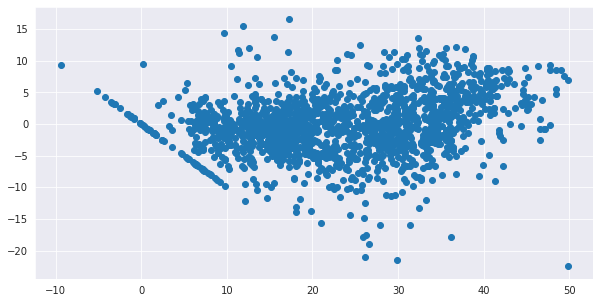

In [98]:
# Heteroscadacity plot
plt.scatter(pred_test,(Y_test)-(pred_test))

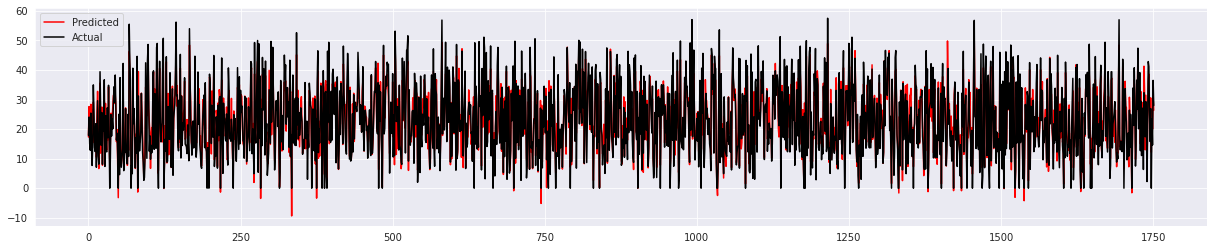

In [99]:
plt.figure(figsize=(21,4))
plt.plot((np.array(pred_test)), c= 'r' )
plt.plot(np.array(Y_test), c = 'black')
plt.legend(["Predicted","Actual"])
plt.show()

In [100]:
important_feature = pd.DataFrame({'Feature' : list(X_train.columns),'Feature Importance' : Gradient_Boosting.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

Feature  Feature Importance
0           Temperature            0.316288
34  Functioning_Day_Yes            0.178991
1              Humidity            0.126824
5              Rainfall            0.062041
4       Solar_Radiation            0.049319
32       Seasons_Winter            0.035609
24              Hour_18            0.030533
10               Hour_4            0.024432
11               Hour_5            0.022500
27              Hour_21            0.017582
25              Hour_19            0.016874
46  weekday0_weekend1_1            0.015566
28              Hour_22            0.014342
9                Hour_3            0.013481
26              Hour_20            0.011635
14               Hour_8            0.009866
43             month_10            0.008124
23              Hour_17            0.007102
8                Hour_2            0.005747
12               Hour_6            0.005565
44             month_11            0.005510
39              month_6            0.004916
16              Hour_10            0.003136
33   Holiday_No Holiday            0.002752
13               Hour_7            0.001955
41              month_8            0.001809
17              Hour_11            0.001670
36              month_3            0.001432
31       Seasons_Summer            0.001240
29              Hour_23            0.000784
3            Visibility            0.000684
2            Wind_speed            0.000525
38              month_5            0.000345
45             month_12            0.000296
22              Hour_16            0.000270
7                Hour_1            0.000170
37              month_4            0.000044
20              Hour_14            0.000039
6              Snowfall            0.000000
18              Hour_12            0.000000
40              month_7            0.000000
19              Hour_13            0.000000
42              month_9            0.000000
15               Hour_9            0.000000
35              month_2            0.000000
21              Hour_15            0.000000
30       Seasons_Spring            0.000000

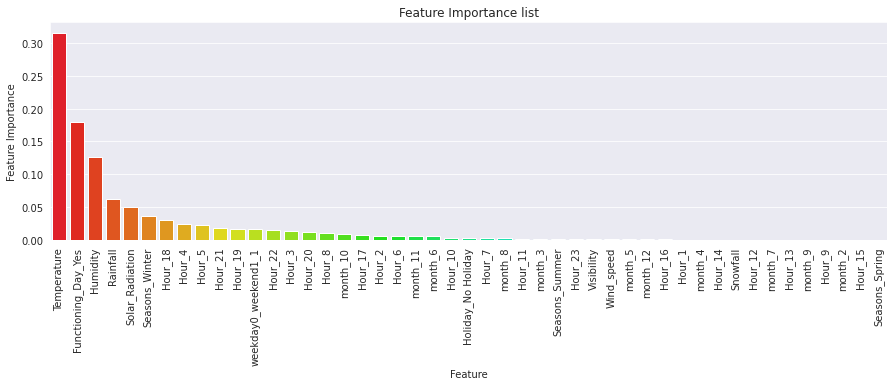

In [101]:

fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

Based on above Chart, Gradient Boosting regression model results as, highly importance features are Temperature, Functioning day, Humidity, Rainfall and Solar radiation these are highly decides Bike renting.

# **Counclusion**

In [69]:
train =[{'Model Name':'Linear regression train ',
       'MSE':linear_train_MSE,
       'RMSE':linear_train_RMSE,
       'MAE':linear_train_MAE,
       'R2 score':linear_train_r2,
       'Adjusted R2':linear_train_adjusted_r2
       },
       {'Model Name':'Gradient_Boosting regression train ',
       'MSE':Gradient_Boosting_train_MSE,
       'RMSE':Gradient_Boosting_train_RMSE,
       'MAE':Gradient_Boosting_train_MAE,
       'R2 score':Gradient_Boosting_train_r2,
       'Adjusted R2':Gradient_Boosting_train_adjusted_r2
       },
       {'Model Name':'Random_forest regression train ',
       'MSE':Random_forest_train_MSE,
       'RMSE':Random_forest_train_RMSE,
       'MAE':Random_forest_train_MAE,
       'R2 score':Random_forest_train_r2,
       'Adjusted R2':Random_forest_train_adjusted_r2
       }]
train_df = pd.DataFrame(train)

test =[{'Model Name':'Linear regression test ',
       'MSE':linear_test_MSE,
       'RMSE':linear_test_RMSE,
       'MAE':linear_test_MAE,
       'R2 score':linear_test_r2,
       'Adjusted R2':linear_test_adjusted_r2
       },
       {'Model Name':'Gradient Boosting regression test ',
       'MSE':Gradient_Boosting_test_MSE,
       'RMSE':Gradient_Boosting_test_RMSE,
       'MAE':Gradient_Boosting_test_MAE,
       'R2 score':Gradient_Boosting_test_r2,
       'Adjusted R2':Gradient_Boosting_test_adjusted_r2
       },
       {'Model Name':'Random forest regression test ',
       'MSE':Random_forest_test_MSE,
       'RMSE':Random_forest_test_RMSE,
       'MAE':Random_forest_test_MAE,
       'R2 score':Random_forest_test_r2,
       'Adjusted R2':Random_forest_test_adjusted_r2
       }]
test_df = pd.DataFrame(test)
Result = pd.concat([train_df,test_df],keys=['Training Data','Test Data'])
Result

Model Name        MSE      RMSE  \
Training Data 0             Linear regression train   34.793981  5.898642   
              1  Gradient_Boosting regression train   18.730814  4.327911   
              2      Random_forest regression train    1.544023  1.242587   
Test Data     0              Linear regression test   33.894123  5.821866   
              1   Gradient Boosting regression test   21.489224  4.635647   
              2       Random forest regression test   12.885945  3.589700   

                      MAE  R2 score  Adjusted R2  
Training Data 0  4.459080  0.774553     0.768334  
              1  3.281222  0.878634     0.875286  
              2  0.790713  0.989996     0.989720  
Test Data     0  4.442357  0.784780     0.778844  
              1  3.487369  0.863549     0.859785  
              2  2.207064  0.918177     0.915920

**Comparing to three Models the Random Forest algoritham has highest R2 Score 98 % and 91 % respectively for Train and Test datas and Gradient Boosting algorithm also had good R2 Score 87 % and 86 % respectively for Train and Test datas then, there is no overfting found in all these models. The Feature importance of both models are slightly differnt from each others. So better result We can deploy this models.**


* The demand for rented bikes is higher from months 4 to 10 compared to other months, these months fall during the summertime.

* Use of rental bike count rising during business hours ( 7 to 9 and 17 to 19 ), these are consider as peak hours.

* During none functioning day bikes are seems not rented.

* Performance of the rented bike count during the winter is relatively low, and the bike counts are much raised during the summer.

* When compared to holidays, bike counts are significantly higher on non-holiday days; this may be because of office hours
